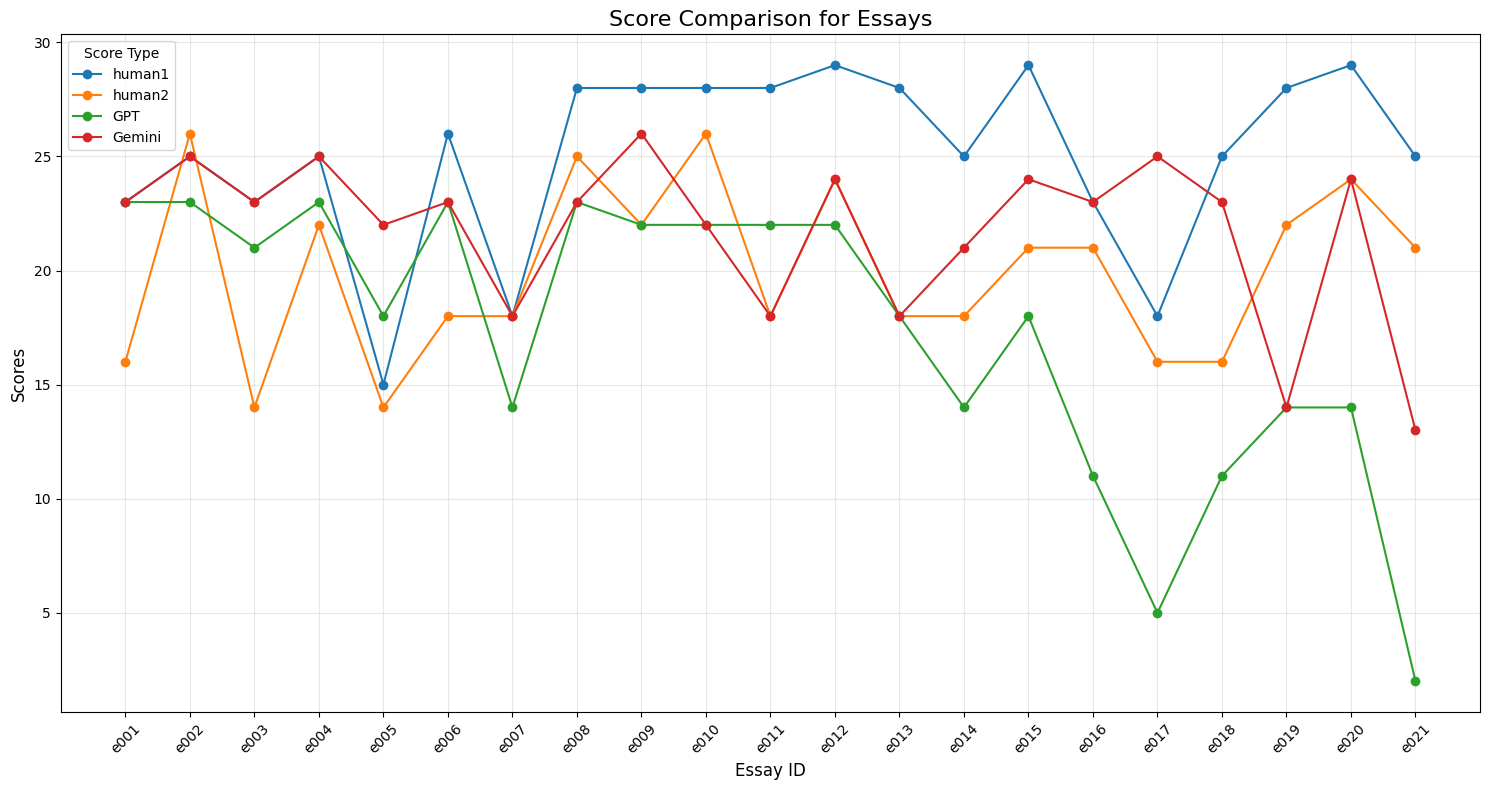

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
folder_path = "OLevels/Results_All/"
# Load data from CSV
file_path = 'E:/Research work/assessment checker research/OLevels/Results_All/Results analysis_Olevels.csv'  # Replace with your CSV file path
df = pd.read_csv(file_path)

# Plot
plt.figure(figsize=(15, 8))

for column in ['human1', 'human2', 'GPT', 'Gemini']:
    plt.plot(df['Essay ID'], df[column], marker='o', label=column)

# Customization
plt.title('Score Comparison for Essays', fontsize=16)
plt.xlabel('Essay ID', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Score Type')
plt.grid(alpha=0.3)

# Show plot
plt.tight_layout()
plt.show()


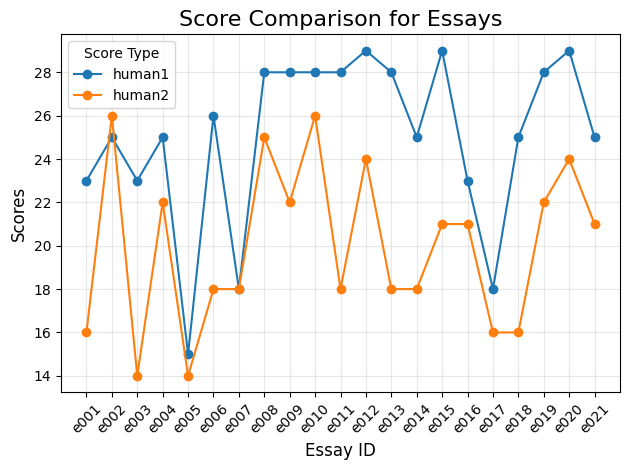

In [2]:
for column in ['human1', 'human2']:
    plt.plot(df['Essay ID'], df[column], marker='o', label=column)

# Customization
plt.title('Score Comparison for Essays', fontsize=16)
plt.xlabel('Essay ID', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Score Type')
plt.grid(alpha=0.3)

# Show plot
plt.tight_layout()
plt.show()

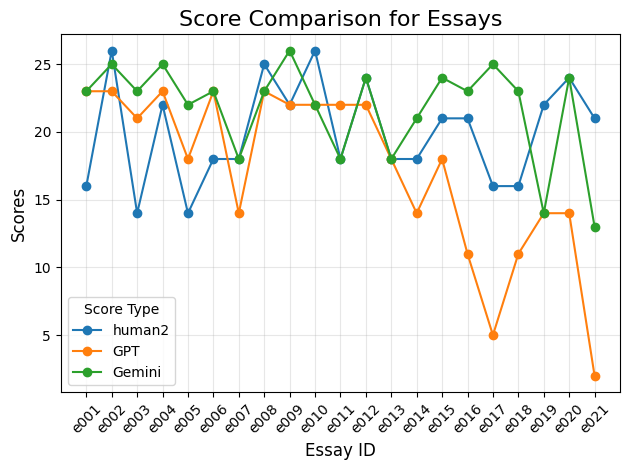

In [3]:
for column in ['human2', 'GPT', 'Gemini']:
    plt.plot(df['Essay ID'], df[column], marker='o', label=column)

# Customization
plt.title('Score Comparison for Essays', fontsize=16)
plt.xlabel('Essay ID', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Score Type')
plt.grid(alpha=0.3)

# Show plot
plt.tight_layout()
plt.show()

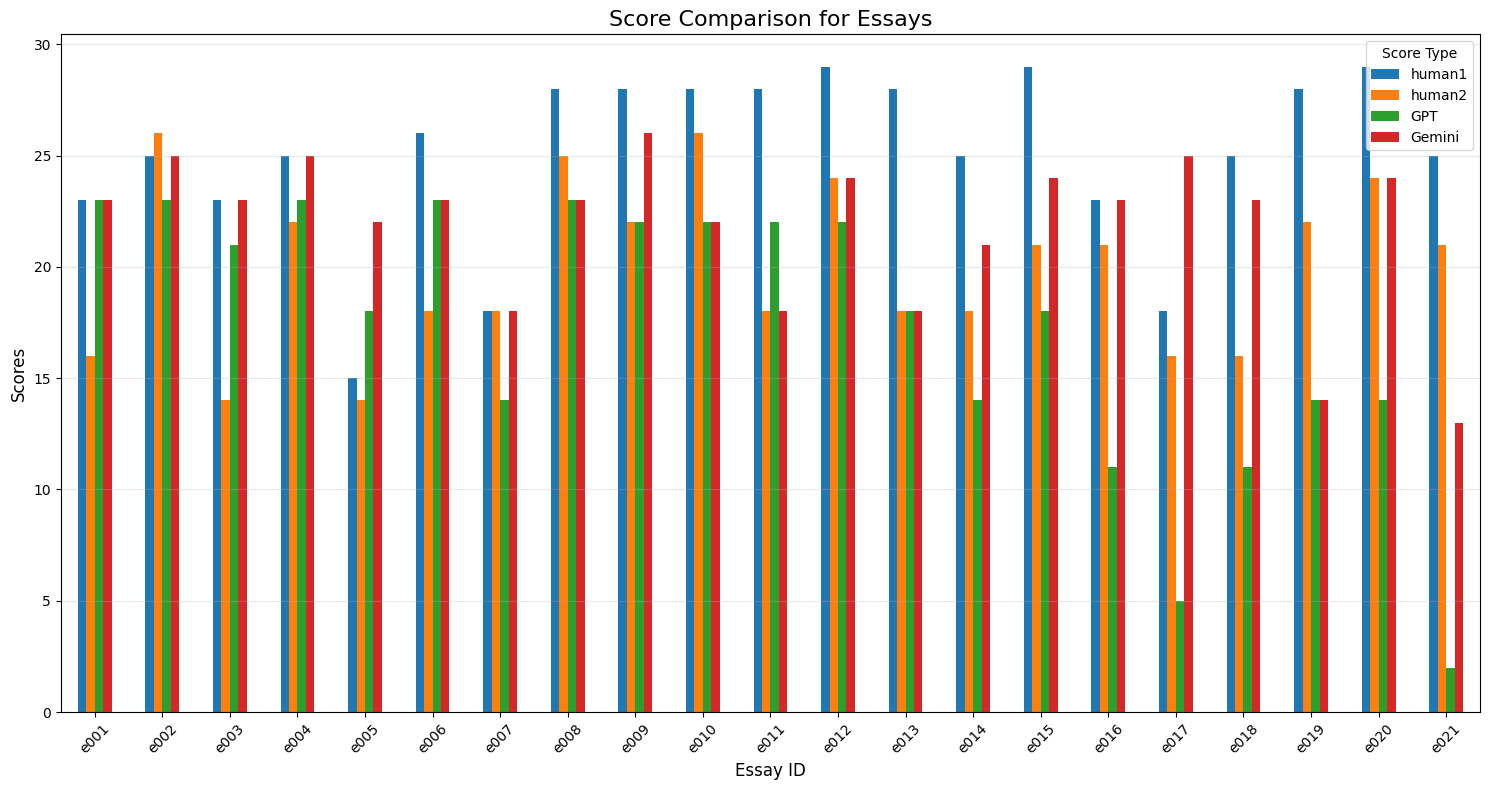

In [4]:
# Bar chart
df.set_index('Essay ID')[['human1', 'human2', 'GPT', 'Gemini']].plot(kind='bar', figsize=(15, 8))

plt.title('Score Comparison for Essays', fontsize=16)
plt.xlabel('Essay ID', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Score Type')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig(folder_path + "OlevelsScores.png")
plt.show()



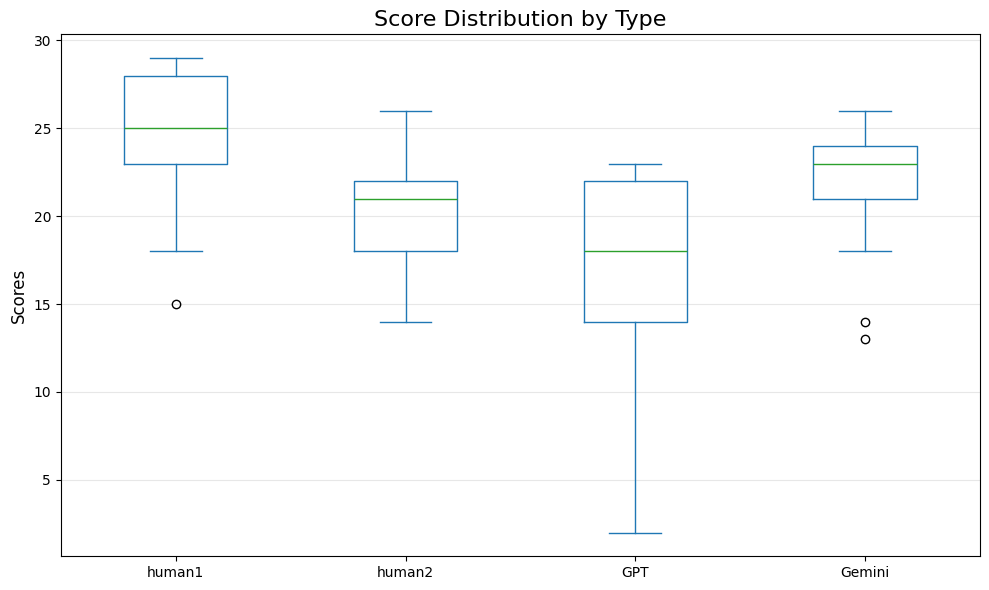

In [5]:
# Box plot
df[['human1', 'human2', 'GPT', 'Gemini']].plot(kind='box', figsize=(10, 6))

plt.title('Score Distribution by Type', fontsize=16)
plt.ylabel('Scores', fontsize=12)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


## COmpute WEighted KAppa


In [9]:
from sklearn.metrics import cohen_kappa_score


# Calculate Weighted Kappa
kappas= {
    'human1 vs human2': round(cohen_kappa_score(df['human1'], df['human2'], weights='quadratic'), 2),
    'human1 vs GPT': round(cohen_kappa_score(df['human1'], df['GPT'], weights='quadratic'), 2),
    'human1 vs Gemini': round(cohen_kappa_score(df['human1'], df['Gemini'], weights='quadratic'), 2),
    'human2 vs GPT': round(cohen_kappa_score(df['human2'], df['GPT'], weights='quadratic'), 2),
    'human2 vs Gemini': round(cohen_kappa_score(df['human2'], df['Gemini'], weights='quadratic'), 2),
    'GPT vs Gemini': round(cohen_kappa_score(df['GPT'], df['Gemini'], weights='quadratic'), 2)    
}

# Save Kappa Scores to CSV
kappa_df = pd.DataFrame(list(kappas.items()), columns=['Comparison', 'Weighted Kappa'])
kappa_df.to_csv(folder_path + 'kappas.csv', index=False)


In [7]:
from sklearn.metrics import cohen_kappa_score


# Calculate Weighted Kappa
kappas= {
    'human1 vs human2': round(cohen_kappa_score(df['human1'], df['human2']), 2),
    'human1 vs GPT': round(cohen_kappa_score(df['human1'], df['GPT']), 2),
    'human1 vs Gemini': round(cohen_kappa_score(df['human1'], df['Gemini']), 2),
    'human2 vs GPT': round(cohen_kappa_score(df['human2'], df['GPT']), 2),
    'human2 vs Gemini': round(cohen_kappa_score(df['human2'], df['Gemini']), 2)
}

# Save Kappa Scores to CSV
kappa_df = pd.DataFrame(list(kappas.items()), columns=['Comparison', 'Weighted Kappa'])
kappa_df.to_csv(folder_path + 'kappasweightless.csv', index=False)
